In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Initialization
s1 = np.array([-4, -1, 1, -1, 1, 0, -3, 4, -4, -3])
s2 = np.array([-4, -5, -4, -4, -2, -2, 4, 2, 1, 3])
s3 = np.array([-2, -1, -1, -4, -4, 5, 2, 4, -4, 1])

y = np.array([-11, 2, -3, 12.5, 4, 0.5, 6.5, -11, -12, -2.5])

# Helper function to calculate circular cross correlation between vectors
def periodic_corr_np(x, y):
    """Periodic correlation, implemented using np.correlate.

    x and y must be real sequences with the same length.
    """
    return np.correlate(x, np.hstack((y[1:], y)), mode='valid')

# Helper function to find the element of largest magnitude
def max_elem(x):
    x = np.abs(x)
    minimum = np.min(x)
    maximum = np.max(x)
    if (np.abs(maximum) > np.abs(minimum)):
        return maximum
    else:
        return minimum

# Helper function to find the index of the element with largest magnitude
def argmax(x):
    minimum = np.min(x)
    maximum = np.max(x)
    min_idx = np.argmin(x)
    max_idx = np.argmax(x)
    if (np.abs(maximum) > np.abs(minimum)):
        return max_idx
    else:
        return min_idx
    

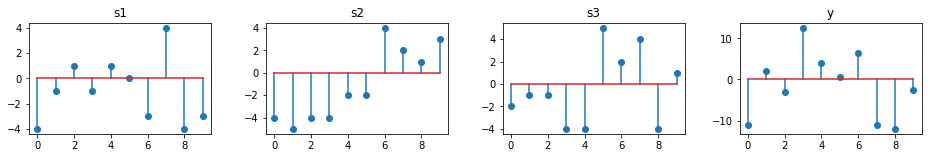

In [3]:
# Plot of the signals s1, s2, s3 and the received signal y
fig = plt.figure(figsize=(16,10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
signals = [s1, s2, s3, y]
titles = ['s1', 's2', 's3', 'y']
idx = 441

for i in range(4):
    fig.add_subplot(idx + i)
    plt.stem(signals[i])
    plt.title(titles[i]);

Maximum for satellite 1: 143, with shift 9
Maximum for satellite 2: 238, with shift 7
Maximum for satellite 3: 131, with shift 3

Therefore, we pick satellite 2 with t2 = 7
Now performing least squares:
a2 = 2.144144

Orthogonal Update Step:

 Residual = [-2.42342342  6.28828829  1.28828829  3.92342342 -0.28828829 -1.64414414
  0.06756757 -2.42342342 -1.27927928  6.07657658]


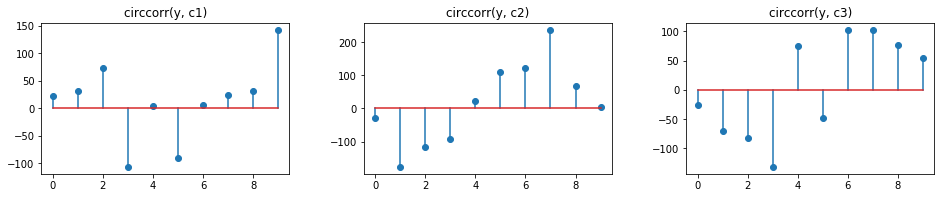

In [4]:
# Step 1: Cross correlate y with all of the signals and find si with the max correlation at ti
c1 = periodic_corr_np(y, s1)
c2 = periodic_corr_np(y, s2)
c3 = periodic_corr_np(y, s3)

c_signals = [c1, c2, c3]
c_titles = ['circcorr(y, c%d)' % i for i in range(1,4)]

# Plot cross correlated signals
fig = plt.figure(figsize=(16,10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
c_idx = 331
for i in range(3):
    fig.add_subplot(c_idx + i)
    plt.stem(c_signals[i])
    plt.title(c_titles[i]);

# Find MAX AND ARGMAX
m1, t1 = max_elem(c1), argmax(c1)
m2, t2 = max_elem(c2), argmax(c2)
m3, t3 = max_elem(c3), argmax(c3)

print('Maximum for satellite 1: %d, with shift %d' % (m1, t1))
print('Maximum for satellite 2: %d, with shift %d' % (m2, t2))
print('Maximum for satellite 3: %d, with shift %d' % (m3, t3))

print('\nTherefore, we pick satellite 2 with t2 = 7')

s2_s = np.roll(s2, 7)

print('Now performing least squares:')
a2 = 1 / (s2_s.dot(s2_s)) * s2_s.dot(y)
print('a2 = %f' % a2)

print('\nOrthogonal Update Step:')
r = y -  a2 * s2_s
print('\n Residual = ' + str(r))

Maximum for satellite 1: 76, with shift 3
Maximum for satellite 2: 62, with shift 8
Maximum for satellite 3: 66, with shift 4

Therefore, we pick satellite 1 with t1 = 3

Shifting the satellites by their appropriate shifts and create A matrix

Now performing least squares:

 x = [ 2.00277264 -1.12087404]

Orthogonal Update Step:

 Residual = [ 1.49458674  1.52204912 -2.35707684  0.00541326 -1.12641933 -0.3818986
 -0.62919197 -1.86803538 -1.98613678  2.14846844]


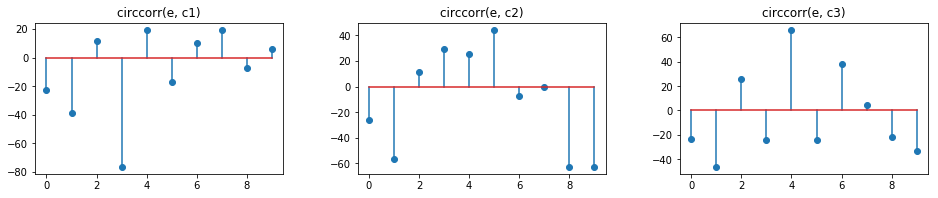

In [5]:
# Step 2: Repeat step one but use the residual as 'y' now */
c1 = periodic_corr_np(r, s1)
c2 = periodic_corr_np(r, s2)
c3 = periodic_corr_np(r, s3)

# Plot cross correlated signals
c_signals = [c1, c2, c3]
c_titles = ['circcorr(e, c%d)' % i for i in range(1,4)]

# Plot cross correlated signals
fig = plt.figure(figsize=(16,10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
c_idx = 331
for i in range(3):
    fig.add_subplot(c_idx + i)
    plt.stem(c_signals[i])
    plt.title(c_titles[i]);

# Find MAX AND ARGMAX
m1, t1 = max_elem(c1), argmax(c1)
m2, t2 = max_elem(c2), argmax(c2)
m3, t3 = max_elem(c3), argmax(c3)

print('Maximum for satellite 1: %d, with shift %d' % (m1, t1))
print('Maximum for satellite 2: %d, with shift %d' % (m2, t2))
print('Maximum for satellite 3: %d, with shift %d' % (m3, t3))

print('\nTherefore, we pick satellite 1 with t1 = 3')

print('\nShifting the satellites by their appropriate shifts and create A matrix')
s1_s = np.roll(s1, 3) 
s2_s = np.roll(s2, 7)
A = np.column_stack((s2_s, s1_s))

print('\nNow performing least squares:')
x = np.linalg.lstsq(A, y, rcond = None)[0]
print('\n x = ' + str(x))

print('\nOrthogonal Update Step:')
r = y - A.dot(x)
print('\n Residual = ' + str(r))

Maximum for satellite 1: 18, with shift 1
Maximum for satellite 2: 23, with shift 3
Maximum for satellite 3: 47, with shift 4

Therefore, we pick satellite 3 with t3 = 4

Shifting the satellites by their appropriate shifts and create A matrix

Now performing least squares:

 x = [ 2.  -1.   0.5]

Orthogonal Update Step:

 Residual = [ 0.00000000e+00  0.00000000e+00 -3.55271368e-15  0.00000000e+00
  0.00000000e+00  2.77555756e-16  1.77635684e-15 -3.55271368e-15
 -3.55271368e-15 -8.88178420e-16]


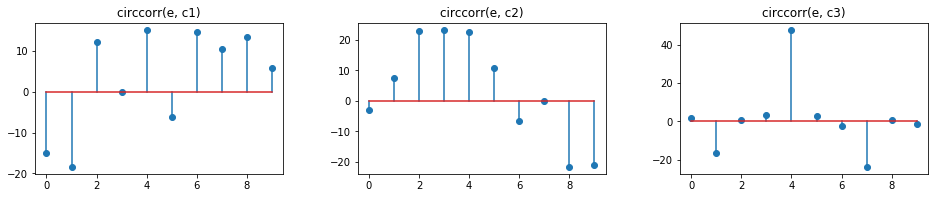

In [6]:
# Step 3: Repeat step two and realize that the residuals are all 0 now
c1 = periodic_corr_np(r, s1)
c2 = periodic_corr_np(r, s2)
c3 = periodic_corr_np(r, s3)

c_signals = [c1, c2, c3]
c_titles = ['circcorr(e, c%d)' % i for i in range(1,4)]

# Plot cross correlated signals
fig = plt.figure(figsize=(16,10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
c_idx = 331
for i in range(3):
    fig.add_subplot(c_idx + i)
    plt.stem(c_signals[i])
    plt.title(c_titles[i]);

# Find MAX AND ARGMAX
m1, t1 = max_elem(c1), argmax(c1)
m2, t2 = max_elem(c2), argmax(c2)
m3, t3 = max_elem(c3), argmax(c3)

print('Maximum for satellite 1: %d, with shift %d' % (m1, t1))
print('Maximum for satellite 2: %d, with shift %d' % (m2, t2))
print('Maximum for satellite 3: %d, with shift %d' % (m3, t3))

print('\nTherefore, we pick satellite 3 with t3 = 4')

print('\nShifting the satellites by their appropriate shifts and create A matrix')
s1_s = np.roll(s1, 3) 
s2_s = np.roll(s2, 7)
s3_s = np.roll(s3, 4)
A = np.column_stack((s2_s, s1_s, s3_s))

print('\nNow performing least squares:')
x = np.linalg.lstsq(A, y, rcond = None)[0]
print('\n x = ' + str(x))

print('\nOrthogonal Update Step:')
r = y - A.dot(x)
print('\n Residual = ' + str(r))

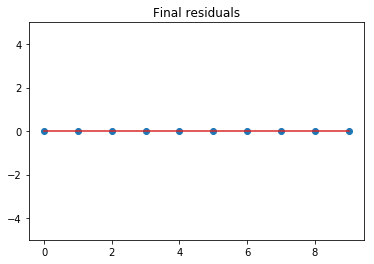

In [7]:
# Final plot of the residual r
fig = plt.figure(figsize=(6,4))
plt.ylim(-5, 5)
plt.stem(r)
plt.title('Final residuals');